BVP solver did not converge.


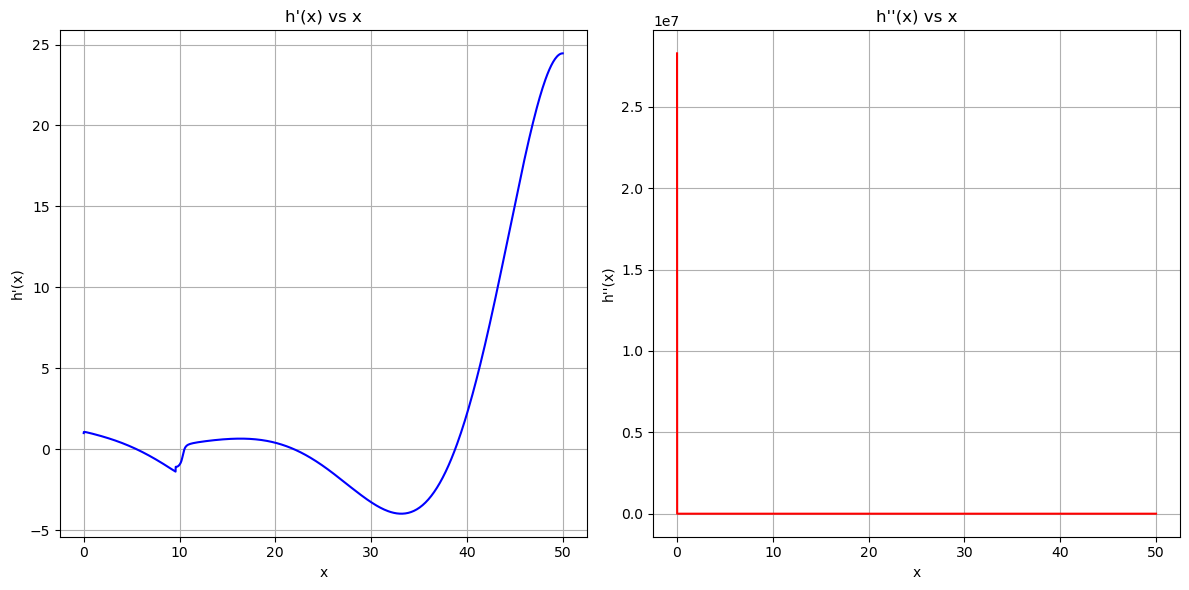

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp

# ------------------------------------------------
# Define the ODE system
# Let y[0] = h
#     y[1] = h'
#     y[2] = h''
# Then y'[2] = h''' = -0.01(1/h^2 + h)
# ------------------------------------------------
def ode_system(x, y):
    h = y[0]
    h_prime = y[1]
    h_double = y[2]
    
    # Avoid division by zero by adding a tiny epsilon
    epsilon = 1e-8
    h_safe = np.where(np.abs(h) < epsilon, epsilon, h)
    
    h_triple = -0.01 * (1/h_safe**2 + h_safe)
    
    return np.vstack((h_prime, h_double, h_triple))

# ------------------------------------------------
# Define boundary conditions
# y = 0
# y = 1
# y[2](x_max) = 0
# ------------------------------------------------
def bc(ya, yb):
    return np.array([
        ya[0] - 0,      # h(0) = 0
        ya[1] - 1,      # h'(0) = 1
        yb[2] - 0       # h''(x_max) = 0
    ])

# ------------------------------------------------
# Set up domain and initial guess
# ------------------------------------------------
x_max = 50
x = np.linspace(0, x_max, 500)

# Initial guess: linear h, zero curvature
y_guess = np.zeros((3, x.size))
y_guess[0] = x      # h ~ x
y_guess[1] = 1      # h' ~ 1
y_guess[2] = 0      # h'' ~ 0

# ------------------------------------------------
# Solve BVP
# ------------------------------------------------
solution = solve_bvp(ode_system, bc, x, y_guess)

if not solution.success:
    print("BVP solver did not converge.")
else:
    print("Solution successful!")

# Extract solution
x_sol = solution.x
h = solution.y[0]
h_prime = solution.y[1]
h_double = solution.y[2]

# ------------------------------------------------
# Plot results
# ------------------------------------------------
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(x_sol, h_prime, 'b')
plt.title("h'(x) vs x")
plt.xlabel("x")
plt.ylabel("h'(x)")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(x_sol, h_double, 'r')
plt.title("h''(x) vs x")
plt.xlabel("x")
plt.ylabel("h''(x)")
plt.grid(True)

plt.tight_layout()
plt.show()
